# Goodreads-books

This is a ML project (defined by myself) with the aim of applying some ML algorithms. 
Origin of the data is(https://www.kaggle.com/jealousleopard/goodreadsbooks).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('goodreads2.csv')

In [4]:
df.head(3)

,average_rating,# num_pages,ratings_count,text_reviews_count
0,4.56,652,1944099,26249
1,4.49,870,1996446,27613
2,4.47,320,5629932,70390


In [5]:
df.shape

(13714, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13714 entries, 0 to 13713
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   average_rating      13714 non-null  float64
 1   # num_pages         13714 non-null  int64  
 2   ratings_count       13714 non-null  int64  
 3   text_reviews_count  13714 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 428.7 KB


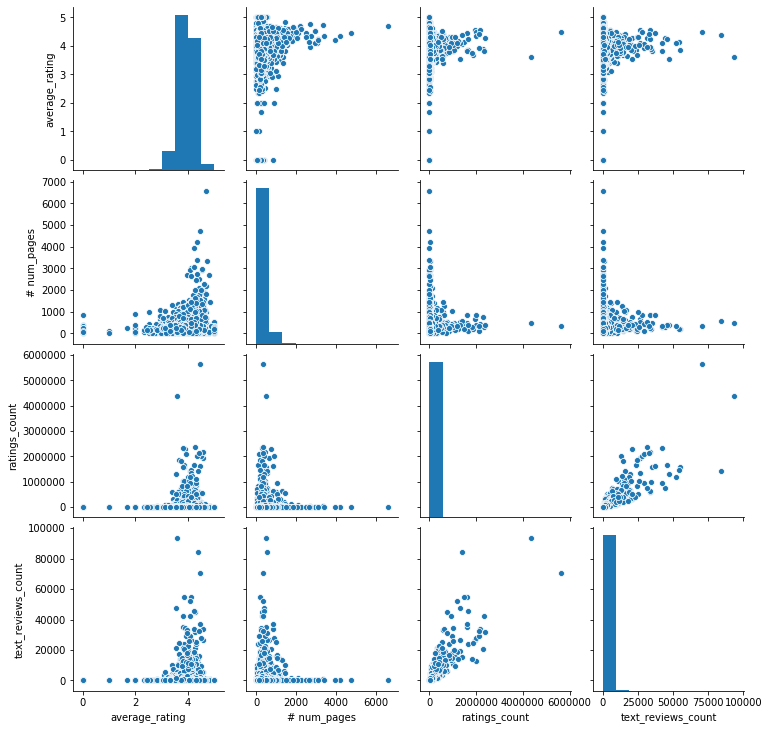

In [7]:
sns.pairplot(df)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df.drop('average_rating',axis=1)
y = df['average_rating']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

**1. Linear Regression**

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
model.score(X_train, y_train)

0.029197341464995197

In [14]:
y_pred = model.predict(X_test)

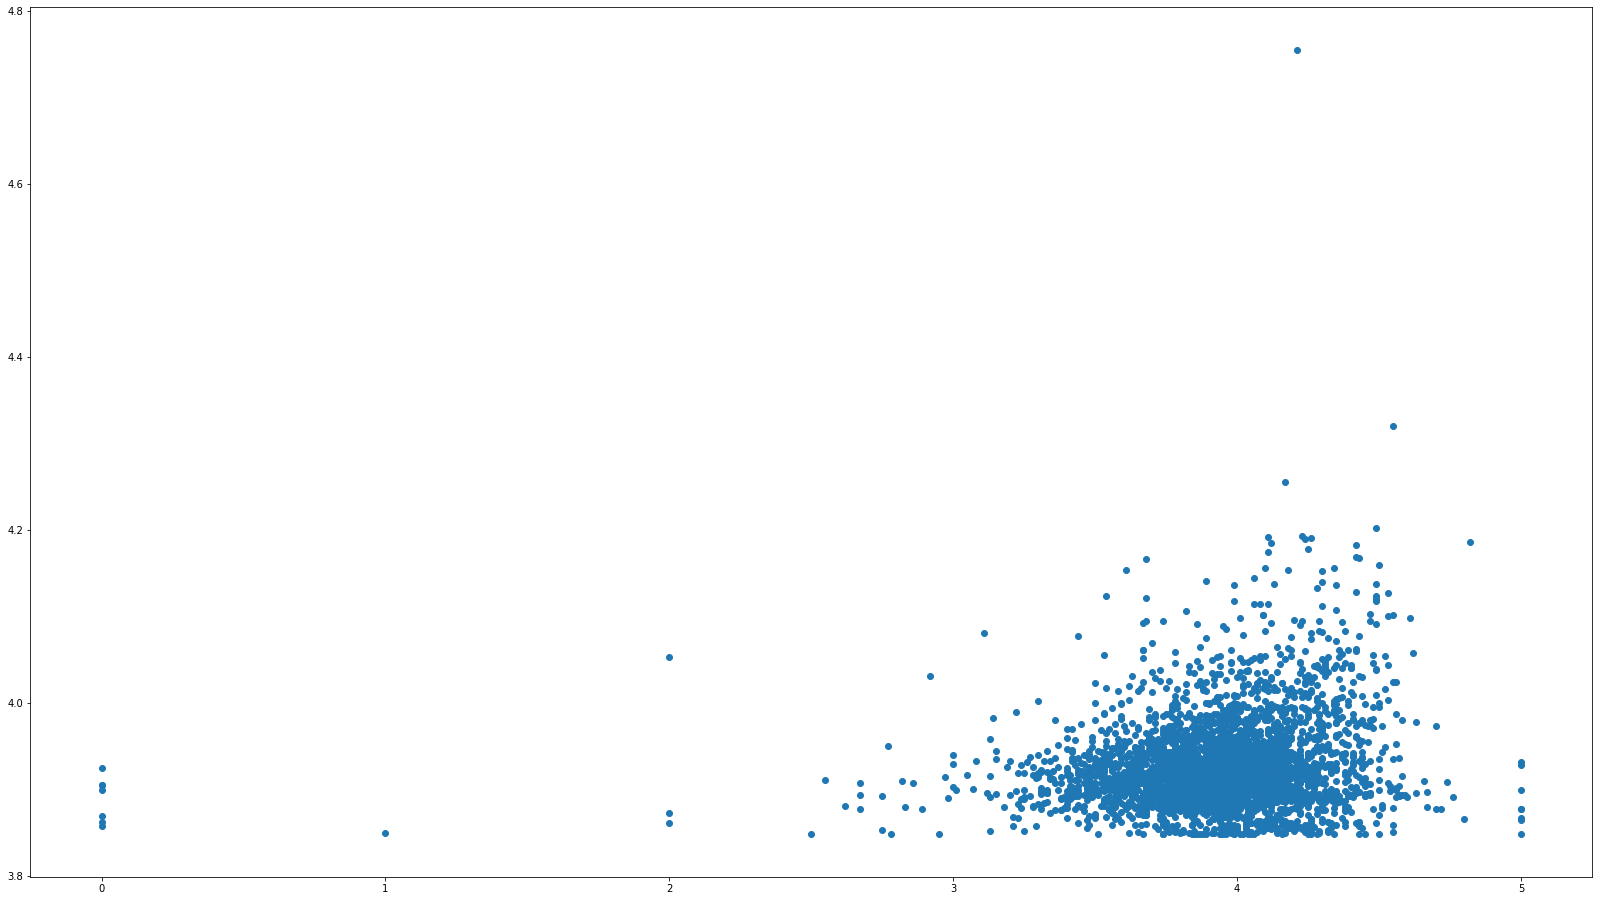

In [15]:
plt.figure(figsize=(28,16))
plt.scatter(y_test, y_pred);

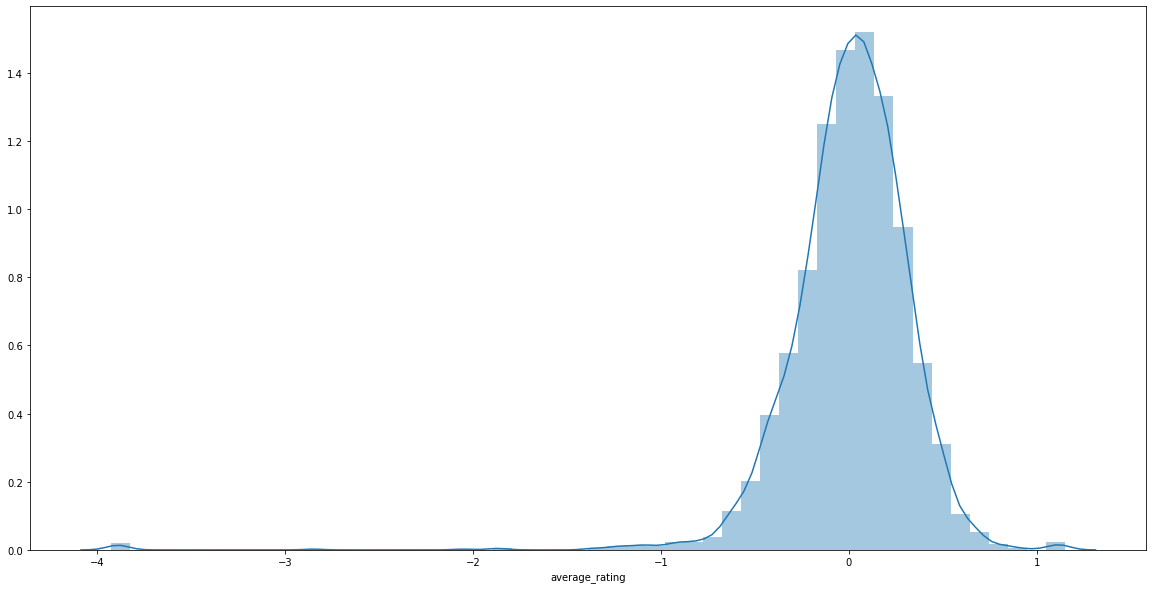

In [16]:
plt.figure(figsize=(20,10))
sns.distplot((y_test-y_pred), bins = 50);

In [ ]:
# definitely NOT linear

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
import numpy as np

In [18]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.22841610561081682
MSE: 0.11708468018737449
RMSE: 0.34217638753627416


In [19]:
metrics.explained_variance_score(y_test, y_pred)

0.02961669715905968

In [20]:
my_dict={"Actual":y_test, "Pred":y_pred}
compare=pd.DataFrame(my_dict)

In [21]:
compare.sample(20)

,Actual,Pred
9432,3.55,3.899966
10008,4.53,4.003440
3798,4.25,4.006501
2246,3.72,3.958248
13229,3.96,3.991266
10371,3.13,3.915048
8795,4.21,3.910655
81,3.31,3.895207
9616,3.73,3.865816
6291,4.18,3.980576


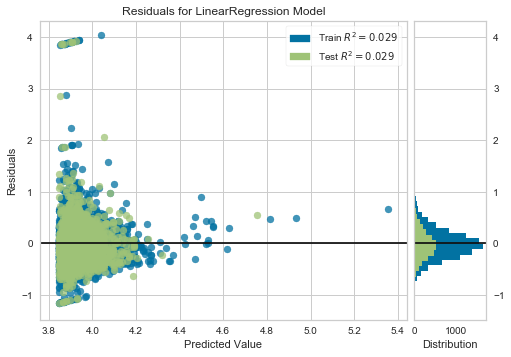

In [22]:
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
model = model
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer

visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

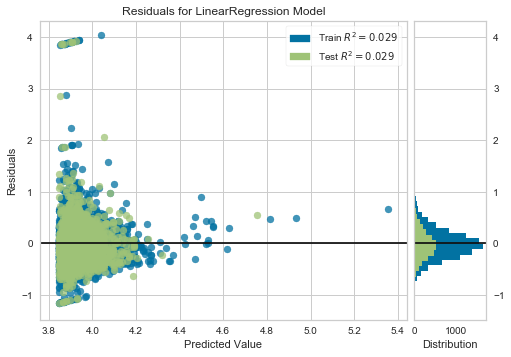

In [23]:
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
model = model
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

In [24]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [25]:
eval_metrics(y_test, y_pred)

r2_score: 0.029308763931633064 
 mae: 0.22841610561081682 
 mse: 0.11708468018737449 
 rmse: 0.34217638753627416


In [26]:
coeff_parameter = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coeff_parameter

,Coefficient
# num_pages,2.293451e-04
ratings_count,8.778792e-08
text_reviews_count,1.605863e-06


**Random Forest Method**

In [27]:
X.head(3)

,# num_pages,ratings_count,text_reviews_count
0,652,1944099,26249
1,870,1996446,27613
2,320,5629932,70390


In [28]:
y.head(3)

0    4.56
1    4.49
2    4.47
Name: average_rating, dtype: float64

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [30]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(n_estimators=1000)
rfc.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [31]:
# now predict
y_head=rfc.predict(X_test)

In [32]:
eval_metrics(y_test, y_head)

r2_score: -0.034439694273840304 
 mae: 0.23323680124691018 
 mse: 0.12539730634037538 
 rmse: 0.354114820842584


**Decision Tree Regression Method**

In [33]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor(random_state=42) # random state
tree_reg.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [34]:
y_head=tree_reg.predict(X_test)

In [35]:
eval_metrics(y_test, y_head)

r2_score: -0.6291312755291996 
 mae: 0.3115567031186715 
 mse: 0.19748727234372887 
 rmse: 0.4443954009029896


**This set of data is not suitable for analysis with regression methods.**